# Linear Regression from scratch in Python

![](images/a.png)

In [57]:
# Imoprting required libraries.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Reading the csv file.
df = pd.read_csv('data.csv')
# Displayinng the first five elements of the dataframe.
df.head(10)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Text(0, 0.5, 'y (Target) : Scores')

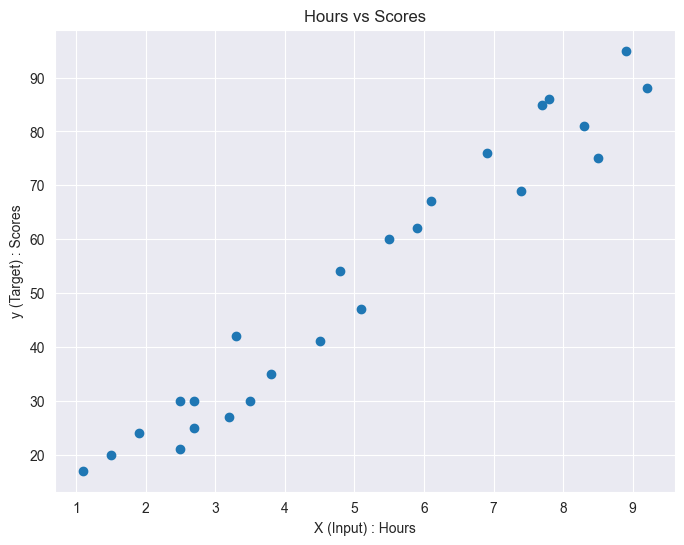

In [58]:
# Taking the Hours and Scores column of the dataframe as X and y
# respectively and coverting them to numpy arrays.
X = np.array(df['Hours']).reshape(-1,1)
y = np.array(df['Scores'])
# Plotting the data X(Hours) on x-axis and y(Scores) on y-axis
plt.figure(figsize=(8,6)) # figure size
plt.scatter(X, y)
plt.title('Hours vs Scores')
plt.xlabel('X (Input) : Hours')
plt.ylabel('y (Target) : Scores')


![](images/b.png)

h(x) = wX + b
w →weights, b →bias

$$h(x) = \hat{y}$$

y_hat = np.dot(X, weights) + bias

![](images/c.png)




In [59]:
print(X.shape, y.shape)


(25, 1) (25,)


## Loss Function

$$J=\frac{1}{2m}\sum_{i=1}^m(\hat{y}-y)^2$$

loss = np.mean((y_hat - y)**2)


The letter J or L can be used to represent the loss function. And loss function is also called the Cost Function, these terms can be used interchangeably.

## Intuition for Gradient Descent

![](images/d.gif)

Here $\theta_0$ is the same as bias and $\theta_1$ is the same as weights.


### Gradient Descent Algorithm
![](images/e.png)

We first initialize weights and bias randomly or a vector of all zeros.

Initializing weights as a matrix of zeros of size: (number of features: n, 1) and bias as 0
weights = np.zeros((n,1))
bias = 0


In [62]:
# Linear Regression class
class LinReg:

    # Initializing lr: learning rate, epochs: no. of iterations,
    # weights & bias: parameters as None
    # default lr: 0.01, epochs: 800
    def __init__(self, lr=0.01, epochs=800):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None
    # Training function: fit
    def fit(self, X, y):
        # shape of X: (number of training examples: m, number of
        # features: n)
        m, n = X.shape

        # Initializing weights as a matrix of zeros of size: (number
        # of features: n, 1) and bias as 0
        self.weights = np.zeros((n,1))
        self.bias = 0

        # reshaping y as (m,1) in case your dataset initialized as
        # (m,) which can cause problems
        y = y.reshape(m,1)

        # empty lsit to store losses so we can plot them later
        # against epochs
        losses = []

        # Gradient Descent loop/ Training loop
        for epoch in range(self.epochs):

            # Calculating prediction: y_hat or h(x)
            y_hat = np.dot(X, self.weights) + self.bias

            # Calculting loss
            loss = np.mean((y_hat - y)**2)

            # Appending loss in list: losses
            losses.append(loss)

            # Calculating derivatives of parameters(weights, and
            # bias)
            dw = (1/m)*np.dot(X.T, (y_hat - y))
            db = (1/m)*np.sum((y_hat - y))
            # Updating the parameters: parameter := parameter - lr*derivative
            # of loss/cost w.r.t parameter)
            self.weights -= self.lr*dw
            self.bias -= self.lr*db

        # returning the parameter so we can look at them later
        return self.weights, self.bias, losses
    # Predicting(calculating y_hat with our updated weights) for the
    # testing/validation
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [63]:
X_train, X_test, y_train, y_test = X[:20], X[20:], y[:20], y[20:]
model = LinReg(epochs=100)
w, b, l = model.fit(X_train,y_train)

Text(0, 0.5, 'y (Target) : Scores')

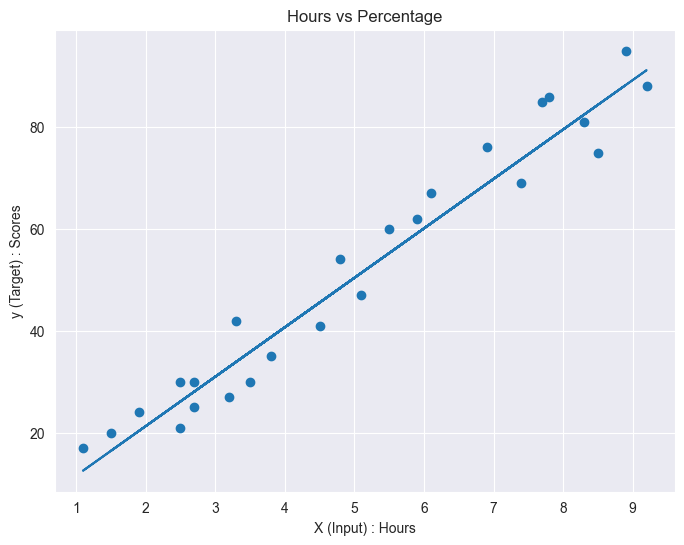

In [64]:
# Plotting our predictions.
fig = plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.plot(X, model.predict(X))  # X and predictions.
plt.title('Hours vs Percentage')
plt.xlabel('X (Input) : Hours')
plt.ylabel('y (Target) : Scores')

In [65]:
# Predicting on the test set.
X_test_preds = model.predict(X_test)
X_test_preds

array([[28.05316177],
       [48.44669117],
       [38.73548669],
       [68.84022056],
       [77.58030459]])

## Comparing True values to predictions by the model.

In [66]:
# Comparing True values to our predictions.
Compare_df = pd.DataFrame(data=[np.array(y_test).T, X_test_preds.flatten()]).T
Compare_df.columns = ['Actual', 'Predicted']
Compare_df


,Actual,Predicted
0,30.0,28.053162
1,54.0,48.446691
2,35.0,38.735487
3,76.0,68.840221
4,86.0,77.580305


Text(0, 0.5, 'Loss / Cost')

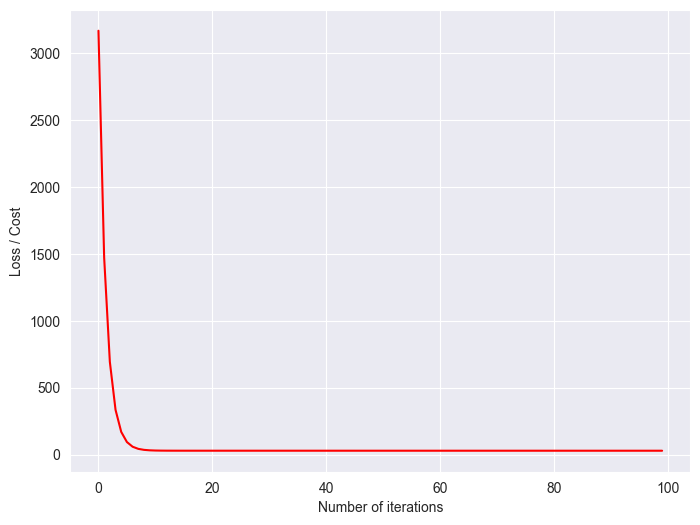

In [67]:
fig = plt.figure(figsize=(8,6))
plt.plot([i for i in range(100)], l, 'r-')
plt.xlabel('Number of iterations')
plt.ylabel('Loss / Cost')

# Locally Weighted Linear Regression in Python
![](images/f.png)

## Parametric vs Non-Parametric Learning Algorithms
### Parametric
In a Parametric Algorithm, we have a fixed set of parameters such as $\theta$ that we try to find (the optimal value) while training the data. After we have found the optimal values for these parameters, we can put the data aside or erase it from the computer and just use the model with parameters to make predictions. Remember, the model is just a function.
### Non-Parametric
In a Non-Parametric Algorithm, you always have to keep the data and the parameters in your computer memory to make predictions. And that’s why this type of algorithm may not be great if you have a really massive dataset.


## Locally Weighted Linear Regression

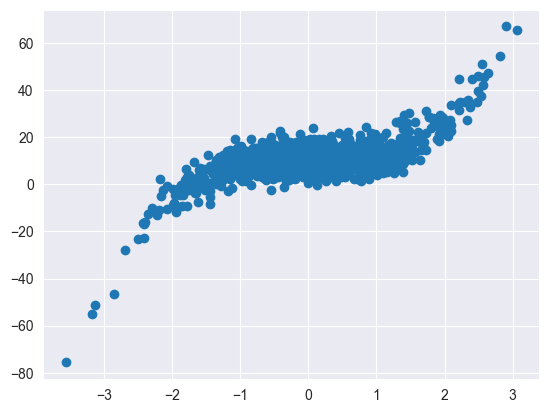

In [68]:
import numpy as np
np.random.seed(8)
X = np.random.randn(1000,1)
y = 2*(X**3) + 10 + 4.6*np.random.randn(1000,1)
plt.scatter(X,y)

Two questions come to mind after reading that —
1. How to assign the weights?
1. How big should the circle be?

### Weighting function (w(i)→weight for the ith training example)

In Linear regression, we had the following loss function —
$$\sum_{i=1}^m(y^{(i)}-\theta^Tx^{(i)})^2$$

The modified loss for locally weighted regression —
$$\sum_{i=1}^m\omega^{(i)}(y^{(i)}-\theta^Tx^{(i)})^2$$

$w^{(i)}$ (the weight for the ith training example) is the only modification.

where

$$w^{(i)}=exp(-\frac{(x^{(i)}-x)^T(x^{(i)}-x)}{2})$$

$x$  is the point where we want to make the prediction. $x^{(i)}$ is the ith training example.


_The value of this function is always between 0 and 1._

So, if we look at the function, we see that
 - If $|x^{(i)}-x|$ is small, $w^{(i)}$ is close to 1.
 - If $|x^{(i)}-x|$ is large, $w^{(i)}$ is close to 0.

The $x^{(i)}$’s which are far from $x$ get $w^{(i)}$ close to zero and the ones which are close to $x$, get $w^{(i)}$ close to 1.


In the loss function, it translates to error terms for the $x^{(i)}$’s which are far from $x$ being multiplied by almost zero and for the $x^{(i)}$’s which are close to $x$ get multiplied by almost 1. In short, it only sums over the error terms for the $x^{(i)}$’s which are close to $x$.

## How big should the circle be?

We introduce a hyperparameter $\tau$ in the weighting function which decided how big the circle should be.

$$w^{(i)}=exp(-\frac{(x^{(i)}-x)^T(x^{(i)}-x)}{2\tau^2})$$

By changing the value of tau we can choose a fatter or a thinner width for circles.


__For the math people here, $\tau$ is the bandwidth of the Gaussian bell-shaped curve of the weighing function.__

Let’s code the weighting matrix. See comments (#).

In [69]:
# Weight Matrix in code. It is a diagonal matrix.
def wm(point, X, tau):
    # tau --> bandwidth
    # X --> Training data.
    # point --> the x where we want to make the prediction.

    # m is the No of training examples .
    m = X.shape[0]

    # Initialising W as an identity matrix.
    w = np.mat(np.eye(m))

    # Calculating weights for all training examples [x(i)'s].
    for i in range(m):
        xi = X[i]
        d = (-2 * tau * tau)
        w[i, i] = np.exp(np.dot((xi-point), (xi-point).T)/d)

    return w


## Finally, The Algorithm

Actually, there exists a closed-form solution for this algorithm which means that we do not have to train the model, we can directly calculate the parameter theta using the following formula.

$$\theta=(X^TWX)^{-1}(X^TWY)$$


__How to calculate theta?__

Just take the partial derivative of the modified loss function with respect to theta and set it equal to zero. Then, do a little bit of linear algebra to get the value of $\theta$.

For reference — [Closed-form solution for locally weighted linear regression](http://www.dsplog.com/2012/02/05/weighted-least-squares-and-locally-weighted-linear-regression/)

And after calculating $\theta$, we can just use the following formula to predict.

$$\theta^Tx$$

Let’s code a predict function. See comments (#)

In [72]:
def predict(X, y, point, tau):

    # m = number of training examples.
    m = X.shape[0]
    # Appending a cloumn of ones in X to add the bias term.
    ## # Just one parameter: theta, that's why adding a column of ones
    # to X and also adding a 1 for the point where we want to predict.
    X_ = np.append(X, np.ones(m).reshape(m,1), axis=1)

    # point is the x where we want to make the prediction.
    point_ = np.array([point, 1])

    # Calculating the weight matrix using the wm function we wrote earlier.
    w = wm(point_, X_, tau)

    # Calculating parameter theta using the formula.
    theta = np.linalg.pinv(X_.T*(w * X_))*(X_.T*(w * y))

    # Calculating predictions.
    pred = np.dot(point_, theta)

    # Returning the theta and predictions
    return theta, pred


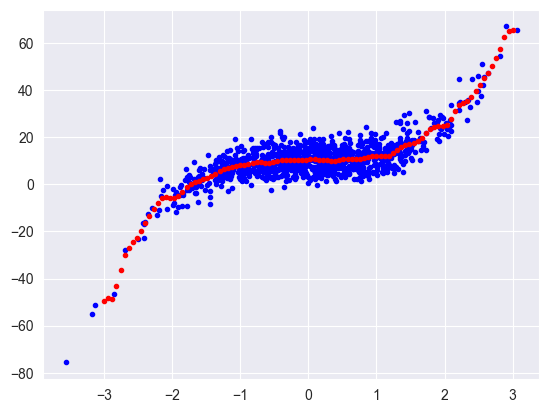

In [73]:
def plot_predictions(X, y, tau, nval):
    # X --> Training data.
    # y --> Output sequence.
    # nval --> number of values/points for which we are going to
    # predict.
    # tau --> the bandwidth.
    # The values for which we are going to predict.
    # X_test includes nval evenly spaced values in the domain of X.
    X_test = np.linspace(-3, 3, nval)

    # Empty list for storing predictions.
    preds = []

    # Predicting for all nval values and storing them in preds.
    for point in X_test:
        theta, pred = predict(X, y, point, tau)
        preds.append(pred)

    # Reshaping X_test and preds
    X_test = np.array(X_test).reshape(nval,1)
    preds = np.array(preds).reshape(nval,1)

    # Plotting
    plt.plot(X, y, 'b.')
    plt.plot(X_test, preds, 'r.') # Predictions in red color.
    plt.show()
plot_predictions(X, y, 0.08, 100)


## When to use Locally Weighted Linear Regression?
- When n (number of features) is small.
- If you don’t want to think about what features to use.


# Normal Equation

## Gradient Descent Algorithm (Recap)

![](images/g.png)

First, we initialize the parameter theta randomly or with all zeros. Then,
1. Calculate the prediction/hypothesis $\hat{y}$ using the equation 1 above.
1. Then use the prediction/hypothesis $\hat{y}$ to calculate MSE loss like this — $(\hat{y}-y)^2$.
1. Then take the partial derivative ($\nabla$) of the MSE loss with respect to the parameter theta .
1. Finally, use this partial derivative ($\nabla$) to update the parameter theta like this — $\theta := \theta -lr*\nabla$, where $lr$ is the learning rate.
1. Repeat steps 1 to 4 until we reach an optimal value for the parameter $\theta$.


## Normal Equation
Gradient Descent is an iterative algorithm meaning that you need to take multiple steps to get to the Global optimum (to find the optimal parameters) but it turns out that for the special case of Linear Regression, there is a way to solve for the optimal values of the parameter theta to just jump in one step to the Global optimum without needing to use an iterative algorithm and this algorithm is called the Normal Equation. It works only for Linear Regression and not any other algorithm.

Normal Equation is the Closed-form solution for the Linear Regression algorithm which means that we can obtain the optimal parameters by just using a formula that includes a few matrix multiplications and inversions.

To calculate $\theta$, we take the partial derivative of the MSE loss function (equation 2) with respect to $\theta$ and set it equal to zero. Then, do a little bit of linear algebra to get the value of $\theta$.

### This is the Normal Equation —

$$\theta=(X^TWX)^{-1}X^T\hat{y}$$


### The Algorithm
1. Calculate $\theta$ using the Normal Equation.
1. Use the $\theta$ to make predictions.

Check the shapes of $X$ and $y$ so that the equation matches up.

In [74]:
import numpy as np
np.random.seed(42)
X = np.random.randn(500,1)
y = 2*X + 1 + 1.2*np.random.randn(500,1)
X.shape, y.shape


((500, 1), (500, 1))

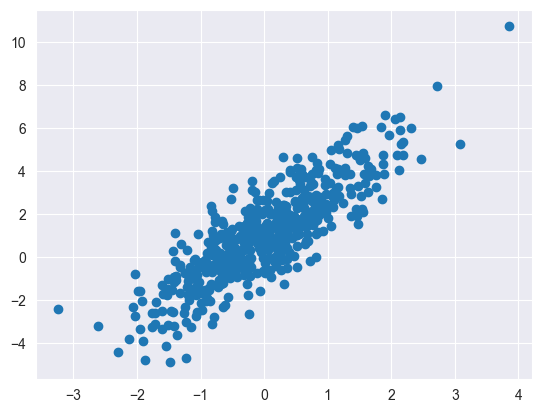

In [75]:
plt.scatter(X, y)


## Find $\theta$


In [76]:
def find_theta(X, y):
    m = X.shape[0] # Number of training examples.
    # Appending a column of ones in X to add the bias term.
    X = np.append(X, np.ones((m,1)), axis=1)
    # reshaping y to (m,1)
    y = y.reshape(m,1)

    # The Normal Equation
    theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

    return theta


## Predict Function


In [77]:
def predict(X, theta):
    # Appending a cloumn of ones in X to add the bias term.
    X = np.append(X, np.ones((X.shape[0],1)), axis=1)

    # preds is y_hat which is the dot product of X and theta.
    preds = np.dot(X, theta)

    return preds


## Plotting Predictions


[[1.90949642]
 [1.0388102 ]]


Text(0, 0.5, 'y - target / true')

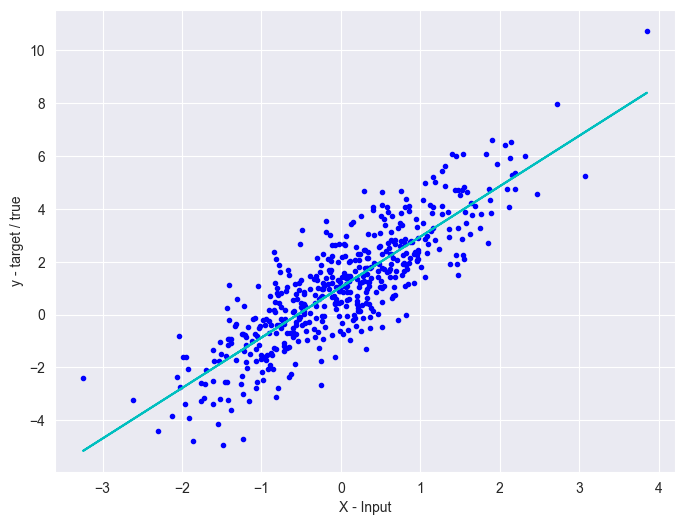

In [78]:
# Getting the Value of theta using the find_theta function.
theta = find_theta(X, y)
print(theta)
# Getting the predictions on X using the predict function.
preds = predict(X, theta)
# Plotting the predictions.
fig = plt.figure(figsize=(8,6))
plt.plot(X, y, 'b.')
plt.plot(X, preds, 'c-')
plt.xlabel('X - Input')
plt.ylabel('y - target / true')


We found the optimal values of theta in just one step, and the $\theta$ we found is the Global Minimum of the MSE loss function for the given data.

### When to use Normal Equation?
If the algorithm you want to use is Linear Regression and exactly Linear Regression and,
1. If $n$ (number of features) is small.
1. If $m$ (number of training examples) is small i.e. around 20,000.

Normal Equation is a good algorithm to consider to build your machine learning model.


# Polynomial Regression
Let’s take the following dataset as a motivating example to understand Polynomial Regression, where the $x$-axis represents the input data $X$ and $y$-axis represents $y$ the true/target values with 1,000 examples ($m$) and 1 feature ($n$).

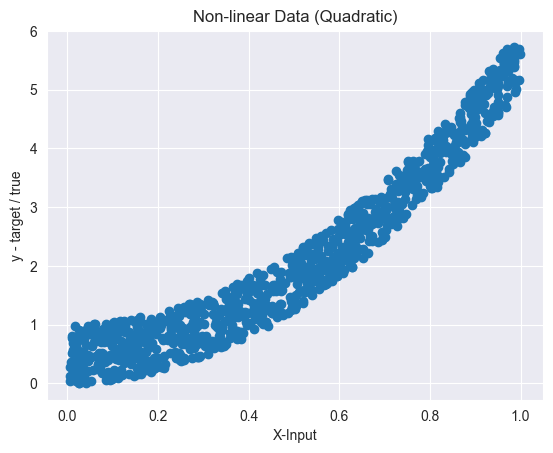

In [79]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
X = np.random.rand(1000,1)
y = 5*((X)**(2)) + np.random.rand(1000,1)
plt.title("Non-linear Data (Quadratic)")
plt.xlabel("X-Input")
plt.ylabel("y - target / true")
plt.scatter(X, y)


If we use the standard Linear Regression for this data, we would only be able to fit a straight line to the data, shown as the blue line in the figure below where the hypothesis was — $\omega_1X + b$ (replacing $\omega$ with $omega_1$ ).

But, we can see that the data is not linear and the line with the red points shown below would be a good fit for the data.

![](images/h.png)

### What features do you want to use?

Do you want to fit a straight line to the data or do you want to fit a hypothesis of the form — $b + \omega_1X + \omega_2X^2$ because maybe the above data looks like a quadratic function fit.

Or maybe you have data that looks like a square root fit, so you might want your hypothesis to be like this — $b + \omega_1X + \omega_2\sqrt{X}$ or your data could be of any degree, so you can choose the features you want and modify the hypothesis function.

All we have to do is define our first feature $x_1$ (feature 1) as $X$ and second feature $x_2$ (feature 2) as $X^2$ or you define $x_1$ as $X$ and $x_2$ as $X^{0.5}$ depending on what features you want to use. And by defining a new feature $x_2$ which would be $X^2$ or $X^{0.5}$, then we see that the machinery we saw in Linear Regression applies to fit these types of non-linear data.

One important thing to note here is that our hypothesis is still linear, because $X^2$ or $X^{0.5}$ are only features. Yet, we get a non-linear fit to the data.

All we have to do is modify the input ($X$) i.e, just add the features of whichever degrees we want, like we will add a feature $X^2$ for our example.

If you modify the input by adding new features, the hypothesis automatically gets modified because $h(x) = \omega X +b$, where w is a vector of size $n$ (number of features).

The figure below shows the first 10 examples, where we added a new feature $X^2$ to our input data.

![](images/i.png)

We can add as many features as we want, which will be some exponentiation of the feature we already have.

### The Algorithm
- Modify the hypothesis function of Linear Regression according to the data.
- Add new higher (whichever) degree features you want to the input.
- Do the Gradient Descent/mini-batch Gradient Descent to the modified input to find the parameters — weights and bias.

### Loss function
Let's first define the loss function, which is the MSE loss function —


In [48]:
def loss(y, y_hat):
    # y --> true/target value.
    # y_hat --> hypothesis

    #Calculating loss.
    loss = np.mean((y_hat - y)**2)
    return loss


In [49]:
# Function to calculate gradients
# Calculating gradient of loss w.r.t parameters(weights and bias).
def gradients(X, y, y_hat):
    # X --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis
    # w --> weights (parameter).
    # b --> bias (parameter).

    # m-> number of training examples.
    m = X.shape[0]

    # Gradient of loss w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y))

    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y))

    return dw, db


### Function to add features to input data

Whatever values we pass into this list, we add a new feature to the input which is X^(value) . For example if we pass in 2 and 3 to the list, we add the features X² and X³ to the input.


In [50]:
def x_transform(X, degrees):
    # X --> Input.
    # degrees --> A list, We add X^(value) feature to the input
    #             where value is one of the values in the list.

    # making a copy of X.
    t = X.copy()

    # Appending columns of higher degrees to X.
    # X = [np.append(X, t**i, axis=1) for i in degrees]
    for i in degrees:
        X = np.append(X, t**i, axis=1)

    return X


### Training Function
The training function includes initializing the weights and bias and the training loop with mini-batch gradient descent.
See comments(#).


In [51]:
def train(X, y, bs, degrees, epochs, lr):

    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # degrees --> A list, We add X^(value) feature to the input
    #             where value is one of the values in the list.
    # lr --> Learning rate.

    # Adding features to input X.
    x = x_transform(X, degrees)

    # m-> number of training examples
    # n-> number of features
    m, n = x.shape

    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0

    # Reshaping y.
    y = y.reshape(m,1)

    # Empty list to store losses.
    losses = []

    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):

            # Defining batches.
            start_i = i*bs
            end_i = start_i + bs
            xb = x[start_i:end_i]
            yb = y[start_i:end_i]

            # Calculating hypothesis
            y_hat = np.dot(xb, w) + b

            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)

            # Updating the parameters.
            w -= lr*dw
            b -= lr*db

        # Calculating loss and appending it in the list.
        l = loss(y, np.dot(x, w) + b)
        losses.append(l)

    # returning weights, bias and losses(List).
    return w, b, losses


### Predict Function
See comments(#).


In [52]:
# Predicting function.
def predict(X, w, b, degrees):

    # X --> Input.
    # w --> weights (parameter).
    # b --> bias (parameter).
    # degrees --> A list, We add X^(value) feature to the input
    #             where value is one of the values in the list.

    # Adding degrees to input X.
    x1 = x_transform(X, degrees)

    # Returning predictions.
    return np.dot(x1, w) + b


### Training and Plotting Predictions
Training the data using the train function.

_Passing only 2 to degrees list. You can try passing any other number or numbers and see what happens._


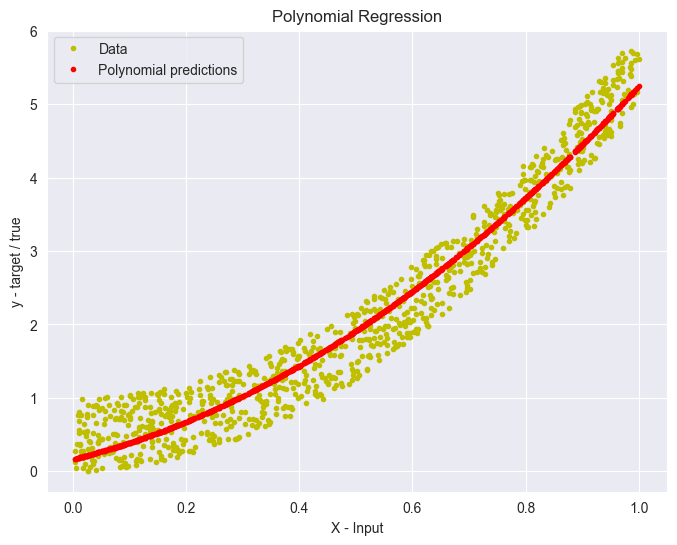

In [53]:
w, b, l = train(X, y, bs=100, degrees=[2], epochs=1000,
                lr=0.01)
# Plotting
fig = plt.figure(figsize=(8,6))
plt.plot(X, y, 'y.')
plt.plot(X, predict(X, w, b, [2]), 'r.')
plt.legend(["Data", "Polynomial predictions"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Polynomial Regression')
plt.show()


Looks good.

Since we have collected loss for every iteration in the list losses, try plotting the losses against the iterations (epochs) to see whether the loss goes down while training.

### $r^2$ Score
Calculating the $r^2$ score for our predictions to see how good we are doing.

For reference — [What is the r2 score](https://www.geeksforgeeks.org/python-coefficient-of-determination-r2-score/)?


In [56]:
def r2_score(y, y_hat):
    return 1 - (np.sum((np.array(y_hat)-np.array(y))**2)/
                np.sum((np.array(y)-np.mean(np.array(y)))**2))
r2_score(y, predict(X, w, b, [2]))


0.9551785719360419

That’s a good $r^2$ score.
